Here we will see another dimesionality reduction technique called LDA and compare it with PCA. Later on, using this we will do topic modelling.
* LDA
* LDA vs PCA
* Topic Modelling

In [91]:
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import  CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA,LatentDirichletAllocation
import matplotlib.pyplot as plt

### LDA(Linear Discriminant Analysis)  and LDA vs PCA

**LDA** is a dimesionality reduction tecnique.It transforms your data from  say 'n' dimensions to 'k'dimensions.   Both are pretty similar in output but with one **major** difference. LDA is a supervised algorithm whereas PCA is not, PCA ignores **class labels**.

 As, we have seen in previous weeks, PCA tries to find directions of maximum variance. PCA projects  data onto new axis in such a way they explain the maximum variance without taking class labels into consideration. **LDA** on the other hand, creates new axis in such a way that when we project data on this axis, there is a maximum separation bewtween two class categories. LDA tries to separate classes as much as feasible on the new axis. 
 
Below is the demonstration of same with Iris dataset.  

In [66]:
data=load_iris().data
target=load_iris().target
target_names=load_iris().target_names

In [67]:
dataframe=pd.DataFrame(data=np.concatenate((data,target.reshape(150,1)),axis=1),columns=['col_1','col_2','col_3','col_4','target'])

In [68]:
dataframe.head()

,col_1,col_2,col_3,col_4,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [69]:
dataframe.drop(columns=['target'],axis=1,inplace=True)

In [70]:
pca = PCA (n_components=2)
X_feature_reduced = pca.fit(dataframe).transform(dataframe)

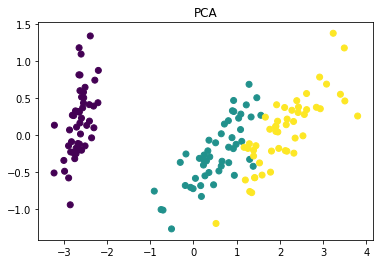

In [71]:
plt.scatter(X_feature_reduced[:,0],X_feature_reduced[:,1],c=target)
plt.title("PCA")
plt.show()

In [72]:
 lda = LatentDirichletAllocation(n_components=2)

In [73]:
X_feature_reduced = lda.fit(dataframe).transform(dataframe)

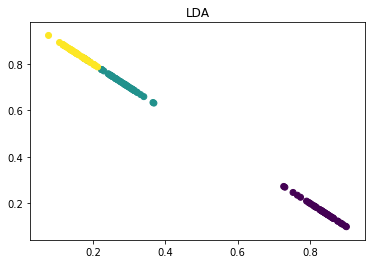

In [74]:
plt.scatter(X_feature_reduced[:,0],X_feature_reduced[:,1],c=target)
plt.title('LDA')
plt.show()

### Observation
As we can see from above that LDA projected data on new axis in such a way that class are separated as much as possible. 

#### How does LDA achieves this?

LDA creates new axis based on two criteria:
* Distance between means of classes
* Variation within each category

It projects data on new axis and finds mean for each class and variance for each class. It tries to maximise the distance between class means and tries to minimise the variation with each class. Using these into consideration we get a new axis.

![alt text](../../img/shivam_panwar_data1.png "data")
Above is the data for two Genes, we want to project them on new axis with one dimension.

<img src="../../img/shivam_panwar_transformed_data.png">

Criterion which we choose above to solve this is

**(µ1-µ2)^2
/(s1+s2)^2**

,where µ1 and µ2 are mean of each class and 's1 and s2' are variation/scatter within a clas while making new axis.
We try to maximise this criteria while making new axis.

### Topic modelling 

**Topic modelling**  is a method of assigning topic to each document. Each topic is made up of certain words.

Consider for example:

We have two topics, topic 1 and topic 2. **'Topic1'** is represented by 'apple, banana, mango' and **topic2** is represented by 'tennis, cricket, hockey'. We can infer that topic1 is talking about fruits and topic2 is talking about sports. We can assign new incoming document into one of these topics and that can be used for **clustering** purpose too. It is used in recommendation systems and many more. 

Another  example: 
Consider we have 6 documents
* apple banana
* apple orange
* banana orange
* tiger cat
* tiger dog
* cat dog

What topic modelling would do is if want to extract say two topic out of these  documents, it will give two distributions, topic-word distribution and doc-topic distribution.  In topic-word representation it should give word wise distribution for each topic and in doc-topic it would give for each document, it's topic representation or distribution of document for each topic.

It's ideal topic-word distribution should be:

|  Topic | Apple | Banana | Orange | Tiger | Cat | Dog | 
| --- | --- | --- | --- | --- | --- | --- | 
| Topic 1 |   .33 | .33 | .33 | 0 | 0 | 0 |
| Topic 2 |   0 | 0 | 0 | 0.33 | 0.33 | 0.33 |

and it's ideal document-topic distrubution should be:

|  Topic | doc1 | doc2 | doc3 | doc4 | doc5 | doc6 | 
| --- | --- | --- | --- | --- | --- | --- | 
| Topic 1 |   1 | 1 | 1 | 0 | 0 | 0 |
| Topic 2 |   0 | 0 | 0 | 1 | 1 | 1 |

and now suppose we have a new document say, ' cat dog apple', its topic wise representation should be


**Topic1:  0.33**

**Topic2: 0.63**


LDA is highly used for this purpose.It's usage for topic  modelling and  has been demonstrated below. We give to it the number of topics we want to find out of the corpus. Remember it follow bow approach therefore, relationship between words are lost in this manner.


In [89]:
lemmatizer=WordNetLemmatizer() #For words Lemmatization
stemmer=PorterStemmer()  #For stemming words
stop_words=set(stopwords.words('english'))

In [76]:
def TokenizeText(text):
    ''' 
     Tokenizes text by removing various stopwords and lemmatizing them
    '''
    text=re.sub('[^A-Za-z0-9\s]+', '', text)
    word_list=word_tokenize(text)
    word_list_final=[]
    for word in word_list:
        if word not in stop_words:
            word_list_final.append(lemmatizer.lemmatize(word))
    return word_list_final

In [90]:
def gettopicwords(topics,cv,n_words=10):
    '''
        Print top n_words for each topic.
        cv=Countvectorizer
    '''
    for i,topic in enumerate(topics):
        top_words_array=np.array(cv.get_feature_names())[np.argsort(topic)[::-1][:n_words]]
        print "For  topic {} it's top {} words are ".format(str(i),str(n_words))
        combined_sentence=""
        for word in top_words_array:
            combined_sentence+=word+" "
        print combined_sentence
        print " "

In [78]:
df=pd.read_csv('million-headlines.zip',usecols=[1])

Data link: 

[https://www.kaggle.com/therohk/million-headlines](https://www.kaggle.com/therohk/million-headlines)

In [79]:
df.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [80]:
%%time 
num_features=100000
# cv=CountVectorizer(min_df=0.01,max_df=0.97,tokenizer=TokenizeText,max_features=num_features)
cv=CountVectorizer(tokenizer=TokenizeText,max_features=num_features)
transformed_data=cv.fit_transform(df['headline_text'])

CPU times: user 5min 6s, sys: 3.17 s, total: 5min 9s
Wall time: 5min 8s


In [81]:
transformed_data

<1103665x87637 sparse matrix of type '<type 'numpy.int64'>'
	with 5855365 stored elements in Compressed Sparse Row format>

In [82]:
%%time
no_topics=10  ## We can change this, hyperparameter
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(transformed_data)

CPU times: user 1h 33min 20s, sys: 5.73 s, total: 1h 33min 25s
Wall time: 1h 33min 32s


**Lda.components_** is a topic_word table, it shows representation of each word in the topic. components_[i, j] can be viewed as pseudocount that represents the number of times word j was assigned to topic i. It can also be viewed as distribution over the words for each topic after normalization

In [83]:
gettopicwords(lda.components_,cv)

For  topic 0 it's top 10 words are 
sydney child first found national family brisbane house record abc 
 
For  topic 1 it's top 10 words are 
court council home face final state drug could job cut 
 
For  topic 2 it's top 10 words are 
call plan sa trump farmer test accused centre go league 
 
For  topic 3 it's top 10 words are 
win queensland crash u school canberra perth set one service 
 
For  topic 4 it's top 10 words are 
australia woman day attack china show death labor tasmania business 
 
For  topic 5 it's top 10 words are 
new wa south coast cup nt price gold killed tasmanian 
 
For  topic 6 it's top 10 words are 
say government world qld country car change help dy minister 
 
For  topic 7 it's top 10 words are 
year nsw back election new adelaide north take fire west 
 
For  topic 8 it's top 10 words are 
police australian interview report say hit get time ban driver 
 
For  topic 9 it's top 10 words are 
man rural melbourne charged murder hour two open hospital road 
 


### Assigning new topic 

We can see that each document is a combination of each topic. Let's see topic represntation of first ten documents.

First ten documents and their topicwise representation is shown below

In [84]:
docs=df['headline_text'][:10]

In [85]:
data=[]
for doc in docs:
    data.append(lda.transform(cv.transform([doc])))

In [86]:
cols=['topic'+str(i) for i in range(1,11)]
doc_topic_df=pd.DataFrame(columns=cols,data=np.array(data).reshape((10,10)))

In [87]:
doc_topic_df['major_topic']=doc_topic_df.idxmax(axis=1)
doc_topic_df['raw_doc']=docs

In [88]:
doc_topic_df

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,major_topic,raw_doc
0,0.016667,0.016667,0.183332,0.016667,0.016667,0.016667,0.016670,0.016667,0.683331,0.016667,topic9,aba decides against community broadcasting lic...
1,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014289,0.871424,0.014287,topic9,act fire witnesses must be aware of defamation
2,0.016667,0.183333,0.183333,0.016667,0.016667,0.016667,0.016667,0.516667,0.016667,0.016667,topic8,a g calls for infrastructure protection summit
3,0.012500,0.012502,0.012500,0.012501,0.012500,0.012500,0.762497,0.137500,0.012500,0.012500,topic7,air nz staff in aust strike for pay rise
4,0.014286,0.014286,0.014286,0.014289,0.014286,0.014286,0.442854,0.014286,0.442857,0.014286,topic9,air nz strike to affect australian travellers
5,0.016667,0.016667,0.016667,0.183463,0.016667,0.683204,0.016667,0.016667,0.016667,0.016667,topic6,ambitious olsson wins triple jump
6,0.183333,0.016667,0.016667,0.016667,0.016667,0.016667,0.516667,0.183333,0.016667,0.016667,topic7,antic delighted with record breaking barca
7,0.012500,0.012500,0.012500,0.137500,0.012500,0.137500,0.012500,0.012500,0.637500,0.012500,topic9,aussie qualifier stosur wastes four memphis match
8,0.014286,0.728571,0.014286,0.014286,0.157143,0.014286,0.014286,0.014286,0.014286,0.014286,topic2,aust addresses un security council over iraq
9,0.016667,0.516667,0.016667,0.016667,0.183334,0.183332,0.016667,0.016667,0.016667,0.016667,topic2,australia is locked into war timetable opp


We saw how LDA can be used for topic modelling. This can be used for document custering based on the doc topic  representation. 

### References
[Statquest LDA](https://www.youtube.com/watch?v=azXCzI57Yfc)

[https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)

[https://sebastianraschka.com/faq/docs/lda-vs-pca.html](https://sebastianraschka.com/faq/docs/lda-vs-pca.html)

